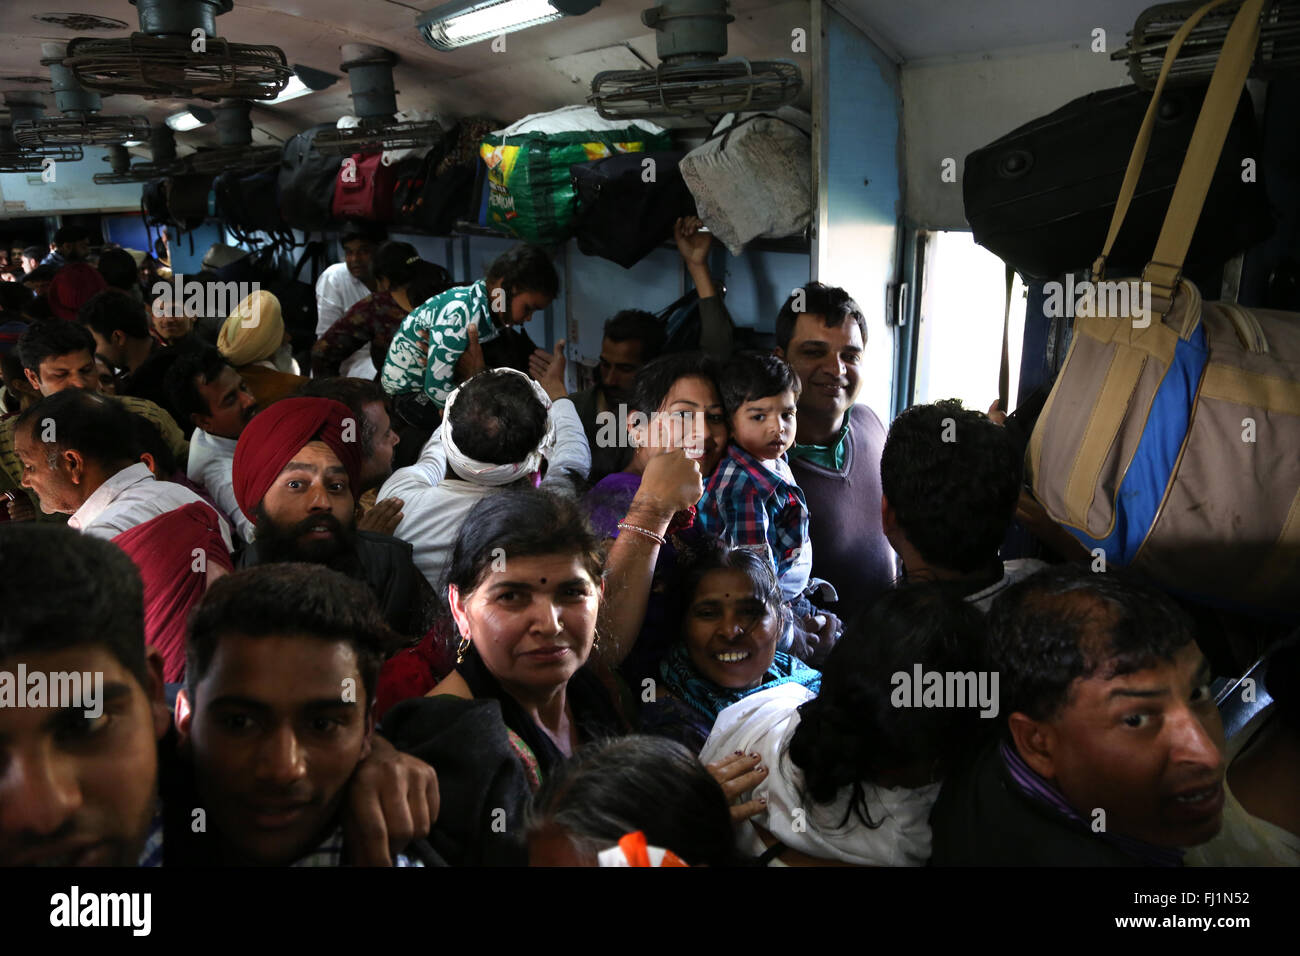

# **Lost in the Crowd: The Scary Reality of Packed Indian trains 🙄**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Train_details_22122017.csv')

<ipython-input-2-fbfe31628cb4>:1: DtypeWarning: Columns (0,2,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Train_details_22122017.csv')


Here is the information regarding the columns present in our dataset.
Dataset information -
1. Train No .
2. Train Name
3. SEQ denotes the unique record number assigned to a specific train operating along a designated route
4. Station Code -
5. Station Name
6. Arrival time - Arrival time at a given station
7. Departure Time - departure time for the same station
8. Distance - Distance travelled by train from its original source
9. Source Station - station name in code
10. Source Station Name - Station name
11. Destination Station (code)
12. Destination Station Name

Lets remove some columns from the dataset , those are useless for us. like source station  and source statino name

In [3]:
df.head(5)

,Train No,Train Name,SEQ,Station Code,Station Name,Arrival time,Departure Time,Distance,Source Station,Source Station Name,Destination Station,Destination Station Name
0,107,SWV-MAO-VLNK,1,SWV,SAWANTWADI R,00:00:00,10:25:00,0,SWV,SAWANTWADI ROAD,MAO,MADGOAN JN.
1,107,SWV-MAO-VLNK,2,THVM,THIVIM,11:06:00,11:08:00,32,SWV,SAWANTWADI ROAD,MAO,MADGOAN JN.
2,107,SWV-MAO-VLNK,3,KRMI,KARMALI,11:28:00,11:30:00,49,SWV,SAWANTWADI ROAD,MAO,MADGOAN JN.
3,107,SWV-MAO-VLNK,4,MAO,MADGOAN JN.,12:10:00,00:00:00,78,SWV,SAWANTWADI ROAD,MAO,MADGOAN JN.
4,108,VLNK-MAO-SWV,1,MAO,MADGOAN JN.,00:00:00,20:30:00,0,MAO,MADGOAN JN.,SWV,SAWANTWADI ROAD


# Data Overview
* The dataset we have contains information of full travelling journey information from source to destination,
* We have arrival time and departure time of the trains for all the stations that train stops
* We have distances between the stations
* We also have station name of destination station

In [4]:
df.drop(['Source Station','Source Station Name'], axis = 1, inplace = True)

# Data Preprocessing

* Steps to follow in processing
1. Because of the lack of dataset of Indian railways,We will mold this dataset
according to our need
2. Create new features 'night_travelling' which will be important feature in determing whether a passenger will show his/her willngness to other passenger or not
3. We are required to group the data based on Train no

In [5]:
# checking null values
df.isna().sum()

Train No                     0
Train Name                   0
SEQ                          0
Station Code                 0
Station Name                 0
Arrival time                 5
Departure Time               5
Distance                     5
Destination Station         10
Destination Station Name    10
dtype: int64

Drop Null values

In [6]:
df.dropna(inplace=True)

In [7]:
df.isna().sum()

Train No                    0
Train Name                  0
SEQ                         0
Station Code                0
Station Name                0
Arrival time                0
Departure Time              0
Distance                    0
Destination Station         0
Destination Station Name    0
dtype: int64

In [8]:
def preprocessing(df):
  # Converting into actual time format
  df['Arrival time'] = pd.to_datetime(df['Arrival time'])
  df['Departure Time'] = pd.to_datetime(df['Departure Time'])

  intermediate_stations = df.groupby('Train No').apply(lambda x: x.iloc[1:-1])

  # creating new feature 'Night travelling' 1 for yes 0 for No
  intermediate_stations['night_travelled'] = intermediate_stations['Arrival time'].apply(lambda x: 1 if x.hour >= 21 or x.hour < 6 else 0)

  # Group by index and aggregate the columns
  grouped_df = intermediate_stations.groupby(level=0).agg({
    'Train Name': 'first',
    'SEQ': 'first',
    'Station Code': 'first',
    'Station Name': 'first',
    'Arrival time': 'first',
    'Departure Time': 'last',
    'Distance': 'sum',
    'Destination Station': 'last',
    'Destination Station Name': 'last',
    'night_travelled': 'max'
})

  # Reset the index to make 'Train No' a column again
  grouped_df.reset_index(inplace=True)

  # Remove the 'Station Code' column
  grouped_df.drop(columns=['Station Code'], inplace=True)

  return grouped_df


In [9]:
processed_df =preprocessing(df)

In [10]:
processed_df['night_travelled'].value_counts()

0    5409
1    4456
Name: night_travelled, dtype: int64

* Perfect!
* We have **Sucessfully** prepared our *unlabeled* balanced dataset.

# Dummy data insertion

In [11]:
# Since we do not have complete dataset so we have to make it
processed_df['Willing_to_share'] = processed_df['night_travelled'].apply(lambda x : 1 if x ==1 else 0)


In [12]:
# removing string values from the 'Distance column'
processed_df = processed_df[~processed_df['Distance'].apply(lambda x: isinstance(x, str))]

# data encoding

In [13]:
processed_df['Arrival time'] = processed_df['Arrival time'].apply(lambda x: x.timestamp())
processed_df['Departure Time'] = processed_df['Departure Time'].apply(lambda x: x.timestamp())

<ipython-input-13-48c8e9cbc389>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df['Arrival time'] = processed_df['Arrival time'].apply(lambda x: x.timestamp())
<ipython-input-13-48c8e9cbc389>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df['Departure Time'] = processed_df['Departure Time'].apply(lambda x: x.timestamp())


In [14]:
processed_df.drop(['SEQ'],axis=1, inplace= True)

<ipython-input-14-7783274231c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df.drop(['SEQ'],axis=1, inplace= True)


In [15]:
def unique_counts():
  counts = []
  columns = processed_df.columns
  for col in columns:
    counts.append(processed_df[col].nunique())
    data = {
        'Columns' : columns,
        'Unique values' : counts
    }
  return pd.DataFrame(data)


In [16]:
unique_counts()

,Columns,Unique values
0,Train No,3690
1,Train Name,1524
2,Station Name,766
3,Arrival time,1161
4,Departure Time,1178
5,Distance,1174
6,Destination Station,457
7,Destination Station Name,455
8,night_travelled,2
9,Willing_to_share,2


* Except night_travelled feature, all values are continuous in nature
* Will apply label encoding , since unique value counts is too much in numbers

Preparing Input and Target datasets

In [17]:
X = processed_df[['Station Name','Distance','Destination Station Name','night_travelled']]
y = processed_df[['Willing_to_share']]

Data split

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y, random_state=40)

# shape and size
print('Input training dataset shape {}'.format(X_train.shape))
print('Input test dataset shape {}'.format(X_test.shape))
print('Output training dataset shape {}'.format(y_train.shape))
print('Output test dataset shape {}'.format(y_test.shape))

Input training dataset shape (2767, 4)
Input test dataset shape (923, 4)
Output training dataset shape (2767, 1)
Output test dataset shape (923, 1)


In [19]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
columns_encoding=['Station Name','Destination Station Name']
for i,column in enumerate(columns_encoding):
    X_train[column]=labelencoder.fit_transform(X_train[column])
    X_test[column] = labelencoder.fit_transform(X_test[column])

In [20]:
X_train.head(3)

,Station Name,Distance,Destination Station Name,night_travelled
1763,635,6,90,0
1108,365,294,39,1
390,106,106,107,1


In [21]:
X_test.head()

,Station Name,Distance,Destination Station Name,night_travelled
1538,75,218,234,0
408,323,417,28,1
45,277,1060,193,0
1184,217,15,10,1
2338,70,418,78,1


# Model training

In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [23]:
y_pred_train = lr.predict(X_train)

In [24]:
# accuracy on training dataset
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_pred_train)

1.0

In [25]:
# accuracy on test dataset
y_pred_test = lr.predict(X_test)
accuracy_score(y_test,y_pred_test)

1.0

* Inferences-
* As expected , our model is totally overfitted, because of our dummy data ingestion

Regression line

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(-0.2, 0, '−0.2'),
  Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4000000000000001, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0000000000000002, 0, '1.0'),
  Text(1.2000000000000002, 0, '1.2')])

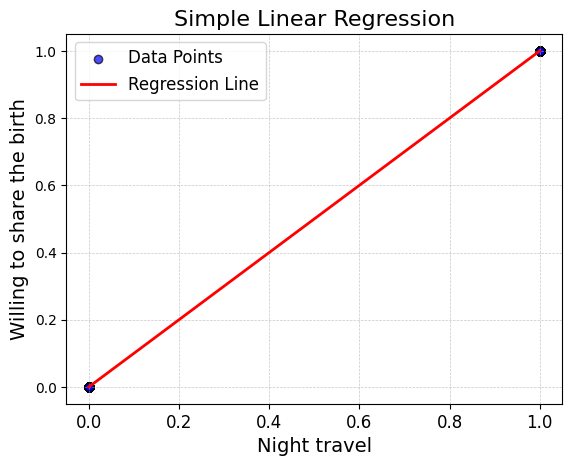

In [36]:
# As only one feature was considered which training the model , so as expected a straight line should be there
x = X_train['night_travelled'].values
y = y_train['Willing_to_share'].values


# for regression line
x_reg = X_test['night_travelled'].values
y_prediction = y_pred_test

# pLOT

plt.scatter(x, y, color='blue', label='Data Points', edgecolors='black', alpha=0.7)

# Plot the regression line
plt.plot(x_reg, y_prediction, color='red', linestyle='-', linewidth=2, label='Regression Line')

# Add labels and title
plt.xlabel('Night travel', fontsize=14)
plt.ylabel('Willing to share the birth', fontsize=14)
plt.title('Simple Linear Regression', fontsize=16)

# Add legend
plt.legend(loc='upper left', fontsize=12)

# Add grid lines
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Customize ticks
plt.xticks(fontsize=12)

* Inferences
1. As you can see both the lines are completely overlaping
2. This reflects that our model just copied from input feature which is **Night travelling**

## ---------------Thank you for your time --------------------------------------